In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

csv_file_path = '/content/drive/MyDrive/SWaT_Dataset_Attack_v0.csv'
data = pd.read_csv(csv_file_path)


features = ['LIT101', ' MV101']
X = data[features]
y = data['Normal/Attack']

#(80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(classification_report(y_test, predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     A ttack       0.00      0.00      0.00         7
      Attack       0.73      0.66      0.69     11032
      Normal       0.95      0.97      0.96     78945

    accuracy                           0.93     89984
   macro avg       0.56      0.54      0.55     89984
weighted avg       0.93      0.93      0.93     89984



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.decomposition import PCA

file_path = '/content/drive/MyDrive/D2_corrected.csv'
data = pd.read_csv(file_path)

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = LabelEncoder().fit_transform(X[column])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

svm_classifier = SVC()

cv_scores = cross_val_score(svm_classifier, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.9592786  0.9592151  0.95978663 0.95894456 0.95843653]
Average cross-validation score: 0.9591322846245804


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
import pandas as pd
from sklearn.model_selection import train_test_split

# Authenticate and create PyDrive client
gauth = GoogleAuth()
#gauth.LocalWebserverAuth()  # Follow the authentication steps in the browser
drive = GoogleDrive(gauth)

file_id = '/content/drive/MyDrive/D2.csv'
downloaded = drive.CreateFile({'id': file_id})
# Read the CSV file into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/D2.csv')

# Split the dataset into features and target variable
X = data.drop(columns=['Normal/Attack'])  # Features (all columns except the target)
y = data['Normal/Attack']  # Target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can use X_train and y_train for training your machine learning model
# and X_test, y_test for evaluating its performance


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Replace with your own file path
file_path = "/content/drive/MyDrive/D2.csv"

# Read the dataset
df = pd.read_csv(file_path)

# Specify the features (X) and the target variable (y)
X = df.drop('Normal/Attack', axis=1)
y = df['Normal/Attack']

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
pip install pydrive pandas scikit-learn


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# After performing cross-validation
# Train the SVM model on the entire training set
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = svm_classifier.predict(X_test)

# Evaluate the model's performance on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)

print("Test Set Accuracy:", accuracy_test)
print("Test Set Confusion Matrix:\n", conf_matrix_test)
print("Test Set Classification Report:\n", report_test)


Test Set Accuracy: 0.9582888809862494
Test Set Confusion Matrix:
 [[ 11070   5350]
 [   280 118276]]
Test Set Classification Report:
               precision    recall  f1-score   support

      Attack       0.98      0.67      0.80     16420
      Normal       0.96      1.00      0.98    118556

    accuracy                           0.96    134976
   macro avg       0.97      0.84      0.89    134976
weighted avg       0.96      0.96      0.95    134976



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

file_path = '/content/drive/MyDrive/D2_corrected.csv'
data = pd.read_csv(file_path)

# Preprocess the data

target_column = 'Normal/Attack'
X = data.drop(target_column, axis=1)
y = data[target_column]

# Encoding categorical variables
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize feature data
scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Convert class vectors to binary class matrices (one-hot encoding)
y_categorical = to_categorical(y_encoded)

# Reshape data to fit model (necessary for Conv1D, expects 3D array)
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_categorical, test_size=0.2, random_state=42)

# Create and compile CNN model
model = Sequential()
model.add(Conv1D(64, 2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(y_categorical.shape[1], activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_split=0.1)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred_classes)
conf_matrix = confusion_matrix(y_true, y_pred_classes)
report = classification_report(y_true, y_pred_classes)

print(f'CNN Model Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(report)

Epoch 1/10
10124/10124 [==============================] - 28s 3ms/step - loss: 0.1418 - accuracy: 0.9572 - val_loss: 0.1079 - val_accuracy: 0.9639
Epoch 2/10
10124/10124 [==============================] - 26s 3ms/step - loss: 0.0941 - accuracy: 0.9678 - val_loss: 0.0754 - val_accuracy: 0.9735
Epoch 3/10
10124/10124 [==============================] - 27s 3ms/step - loss: 0.0757 - accuracy: 0.9731 - val_loss: 0.0735 - val_accuracy: 0.9737
Epoch 4/10
10124/10124 [==============================] - 27s 3ms/step - loss: 0.0644 - accuracy: 0.9768 - val_loss: 0.0855 - val_accuracy: 0.9770
Epoch 5/10
10124/10124 [==============================] - 39s 4ms/step - loss: 0.0569 - accuracy: 0.9796 - val_loss: 0.0526 - val_accuracy: 0.9826
Epoch 6/10
10124/10124 [==============================] - 26s 3ms/step - loss: 0.0521 - accuracy: 0.9814 - val_loss: 0.0429 - val_accuracy: 0.9854
Epoch 7/10
10124/10124 [==============================] - 26s 3ms/step - loss: 0.0475 - accuracy: 0.9829 - val_loss: 0

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

file_path = '/content/drive/MyDrive/D2_corrected.csv'
data = pd.read_csv(file_path)

target_column = 'Normal/Attack'  e
X = data.drop(target_column, axis=1)
y = data[target_column]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize feature data
scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Logistic Regression Model Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(report)


Logistic Regression Model Accuracy: 0.95
Confusion Matrix:
[[ 6881  4158]
 [  226 78719]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.62      0.76     11039
           1       0.95      1.00      0.97     78945

    accuracy                           0.95     89984
   macro avg       0.96      0.81      0.87     89984
weighted avg       0.95      0.95      0.95     89984



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = '/content/drive/MyDrive/D2_corrected.csv'
data = pd.read_csv(file_path)

# Preprocess the data
# Check if 'Normal/Attack' is the correct target column name
target_column = 'Normal/Attack'  # Replace with the actual target column name
X = data.drop(target_column, axis=1)
y = data[target_column]

# Encoding categorical variables
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize feature data
scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Create and train K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f'KNN Model Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(report)


KNN Model Accuracy: 1.00
Confusion Matrix:
[[10934   105]
 [  121 78824]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11039
           1       1.00      1.00      1.00     78945

    accuracy                           1.00     89984
   macro avg       0.99      0.99      0.99     89984
weighted avg       1.00      1.00      1.00     89984



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = '/content/drive/MyDrive/D2_corrected.csv'
data = pd.read_csv(file_path)

# Preprocess the data
# Check if 'Normal/Attack' is the correct target column name
target_column = 'Normal/Attack'  # Replace with the actual target column name
X = data.drop(target_column, axis=1)
y = data[target_column]

# Encoding categorical variables
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize feature data
scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Create and train Multi-Layer Perceptron (MLP) model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, activation='relu', solver='adam')
mlp_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = mlp_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f'MLP Model Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(report)


MLP Model Accuracy: 1.00
Confusion Matrix:
[[10849   190]
 [  130 78815]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     11039
           1       1.00      1.00      1.00     78945

    accuracy                           1.00     89984
   macro avg       0.99      0.99      0.99     89984
weighted avg       1.00      1.00      1.00     89984



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

file_path = '/content/drive/MyDrive/D2_corrected.csv'
data = pd.read_csv(file_path)

imputer = SimpleImputer(strategy='mean')
for col in data.select_dtypes(include=['float64', 'int64']):
    data[col] = imputer.fit_transform(data[[col]])

for col in data.select_dtypes(include=['object']).columns:
    data[col] = LabelEncoder().fit_transform(data[col])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(columns=[data.columns[-1]]))

X = scaled_features
y = data[data.columns[-1]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training Set:", X_train.shape, y_train.shape)
print("Testing Set:", X_test.shape, y_test.shape)

Training Set: (314943, 4) (314943,)
Testing Set: (134976, 4) (134976,)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Fit the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.9582962897107634
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.98      0.67      0.80     16411
           2       0.96      1.00      0.98    118556

    accuracy                           0.96    134976
   macro avg       0.64      0.56      0.59    134976
weighted avg       0.96      0.96      0.95    134976



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the SVM classifier with class weights
svm_classifier = SVC(kernel='rbf', class_weight='balanced', random_state=42)

# Fit the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9366405879563774
Classification Report:
              precision    recall  f1-score   support

           0       0.01      1.00      0.01         9
           1       0.78      0.78      0.78     16411
           2       0.97      0.96      0.96    118556

    accuracy                           0.94    134976
   macro avg       0.59      0.91      0.59    134976
weighted avg       0.95      0.94      0.94    134976



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.9965623518255097
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     16420
           1       1.00      1.00      1.00    118556

    accuracy                           1.00    134976
   macro avg       0.99      0.99      0.99    134976
weighted avg       1.00      1.00      1.00    134976



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the classifier
clf = RandomForestClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
class_report = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(class_report)
print('Confusion Matrix:')
print(conf_matrix)


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/D2.csv')

# Checking for missing values
missing_values = data.isnull().sum()

# Display columns with missing values and their count
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [ ]:
import numpy as np
from sklearn.utils import resample

# Upsample minority class
X_upsampled, y_upsampled = resample(X_train[y_train == y_train.min()],
                                    y_train[y_train == y_train.min()],
                                    replace=True,
                                    n_samples=X_train[y_train == y_train.max()].shape[0],
                                    random_state=123)

# Combine with majority class
X_train_balanced = np.vstack((X_train[y_train == y_train.max()], X_upsampled))
y_train_balanced = np.hstack((y_train[y_train == y_train.max()], y_upsampled))





In [ ]:
import numpy as np
from sklearn.utils import resample

# Assuming X_train and y_train have been defined and contain the training data and labels

# Upsample minority class
minority_class = y_train.min()
majority_class = y_train.max()

X_minority = X_train[y_train == minority_class]
y_minority = y_train[y_train == minority_class]

X_upsampled, y_upsampled = resample(X_minority,
                                    y_minority,
                                    replace=True,
                                    n_samples=len(y_train[y_train == majority_class]),
                                    random_state=123)

# Combine with majority class
X_train_balanced = np.vstack((X_train[y_train == majority_class], X_upsampled))
y_train_balanced = np.hstack((y_train[y_train == majority_class], y_upsampled))


In [ ]:

import numpy as np
import pandas as pd
from sklearn.utils import resample

file_path = '/content/drive/MyDrive/D2.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable

# Print the original distribution of classes
print("Original class distribution:")
print(y.value_counts())

# Perform resampling here...

# After resampling, combine the upsampled minority class with the majority class
# Note: The resampling code goes here, where you define X_upsampled and y_upsampled

# Combine with majority class
X_train_balanced = np.vstack((X[y == y.max()], X_upsampled))
y_train_balanced = np.hstack((y[y == y.max()], y_upsampled))

# Print the new distribution of classes
print("\nNew class distribution after resampling:")
print(pd.Series(y_train_balanced).value_counts())

# Print the shapes of the datasets
print("\nShapes of the datasets:")
print(f"Original X shape: {X.shape}")
print(f"Balanced X shape: {X_train_balanced.shape}")
print(f"Original y shape: {y.shape}")
print(f"Balanced y shape: {y_train_balanced.shape}")


Original class distribution:
Normal     395298
Attack      54584
A ttack        37
Name: Normal/Attack, dtype: int64

New class distribution after resampling:
Normal    395298
0         276742
dtype: int64

Shapes of the datasets:
Original X shape: (449919, 4)
Balanced X shape: (672040, 4)
Original y shape: (449919,)
Balanced y shape: (672040,)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

file_path = '/content/drive/MyDrive/D2_corrected.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable

# Print the original distribution of classes
print("Original class distribution:")
print(y.value_counts())

# Perform resampling here...

# After resampling, combine the upsampled minority class with the majority class
# Note: The resampling code goes here, where you define X_upsampled and y_upsampled

# Combine with majority class
X_train_balanced = np.vstack((X[y == y.max()], X_upsampled))
y_train_balanced = np.hstack((y[y == y.max()], y_upsampled))

# Print the new distribution of classes
print("\nNew class distribution after resampling:")
print(pd.Series(y_train_balanced).value_counts())

# Print the shapes of the datasets
print("\nShapes of the datasets:")
print(f"Original X shape: {X.shape}")
print(f"Balanced X shape: {X_train_balanced.shape}")
print(f"Original y shape: {y.shape}")
print(f"Balanced y shape: {y_train_balanced.shape}")

Original class distribution:
Normal    395298
Attack     54621
Name: Normal/Attack, dtype: int64

New class distribution after resampling:
Normal    395298
0         276742
dtype: int64

Shapes of the datasets:
Original X shape: (449919, 4)
Balanced X shape: (672040, 4)
Original y shape: (449919,)
Balanced y shape: (672040,)


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/D2.csv'  # Replace with the correct path to your CSV file
data = pd.read_csv(file_path)

# Filter and display the rows which are labeled 'A ttack'
a_ttack_rows = data[data['Normal/Attack'] == 'A ttack']
print(a_ttack_rows)


                     Timestamp    LIT101    AIT202   DPIT301 Normal/Attack
172268   30/12/2015 9:51:08 AM  526.5757  8.493848  19.95646       A ttack
172269   30/12/2015 9:51:09 AM  526.2225  8.493848  19.98207       A ttack
172270   30/12/2015 9:51:10 AM  526.1047  8.493848  20.03009       A ttack
172271   30/12/2015 9:51:11 AM  526.0262  8.493848  20.03009       A ttack
172272   30/12/2015 9:51:12 AM  526.2225  8.493848  20.03009       A ttack
172273   30/12/2015 9:51:13 AM  526.3795  8.493848  19.97887       A ttack
172274   30/12/2015 9:51:14 AM  526.6150  8.493848  19.97887       A ttack
172275   30/12/2015 9:51:15 AM  526.8113  8.497693  19.97887       A ttack
172276   30/12/2015 9:51:16 AM  527.0075  8.497693  19.97887       A ttack
172277   30/12/2015 9:51:17 AM  526.9683  8.497693  19.97887       A ttack
172278   30/12/2015 9:51:18 AM  526.7720  8.497693  19.97887       A ttack
172279   30/12/2015 9:51:19 AM  526.3795  8.497693  19.97887       A ttack
172280   30/12/2015 9:51:

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/D2.csv'  # Replace with the correct path to your CSV file
data = pd.read_csv(file_path)

# Correct the 'A ttack' labels by merging them with the 'Attack' class
data['Normal/Attack'] = data['Normal/Attack'].replace('A ttack', 'Attack')

# Optionally, save the corrected dataset to a new CSV file
corrected_file_path = '/content/drive/MyDrive/D2_corrected.csv'  # Replace with the desired path
data.to_csv(corrected_file_path, index=False)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Fit the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.9582888809862494
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.67      0.80     16420
           1       0.96      1.00      0.98    118556

    accuracy                           0.96    134976
   macro avg       0.97      0.84      0.89    134976
weighted avg       0.96      0.96      0.95    134976



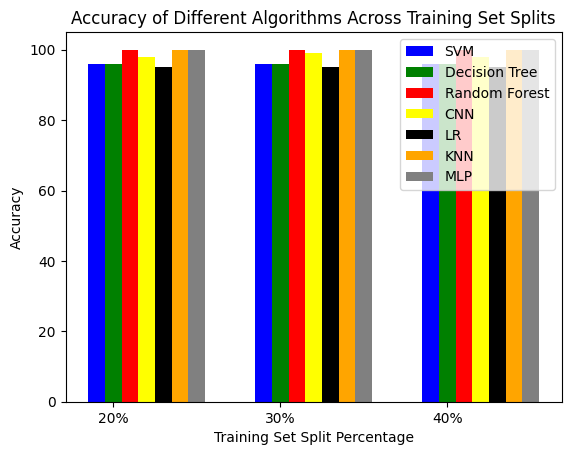

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
algorithms = ['SVM', 'Decision Tree', 'Random Forest', 'CNN', 'LR', 'KNN', 'MLP']
split_percentages = ['20%', '30%', '40%']
accuracy_scores = {
    '20%': [95.85, 95.85, 99.97, 98, 95, 100, 100],
    '30%': [95.82, 95.82, 99.97, 99, 95, 100, 100],
    '40%': [95.85, 95.85, 99.96, 98, 95, 100, 100]
}

colors = ['blue', 'green', 'red', 'yellow', 'black', 'orange', 'gray']

# Plotting
fig, ax = plt.subplots()
bar_width = 0.1
index = np.arange(len(split_percentages))

for i, algorithm in enumerate(algorithms):
    accuracies = [accuracy_scores[split][i] for split in split_percentages]
    ax.bar(index + i * bar_width, accuracies, bar_width, label=algorithm, color=colors[i])

# Formatting the plot
ax.set_xlabel('Training Set Split Percentage')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Different Algorithms Across Training Set Splits')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(split_percentages)
ax.legend()
plt.show()
